# Try AIM

Copyright: GeneGenieDx Corp 2022

Author: Wenhao Gu

Date of creation: 04/06/2022

Date of revision: 05/24/2022

Description: Examples for using the AIM library.

In [1]:
import os
os.environ["PYTHONWARNINGS"] = "ignore"

from sklearn.datasets import make_moons, make_circles

from select_feature_types import *

# 1. Example of make_moons.

In [10]:
# Generate dataset and preprocess.
X, y = make_moons(n_samples=500, shuffle=True, noise=.3, random_state=123)

preprocessed_X = preprocess(X)
feature_matrix = pd.DataFrame(
    {"f0": preprocessed_X[:, 0], "f1": preprocessed_X[:, 1], "label": y}
)

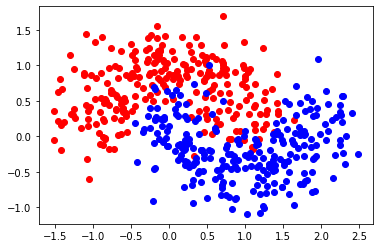

In [11]:
plt.plot(X[y==0,0],X[y==0,1],'ro')
plt.plot(X[y==1,0],X[y==1,1],'bo')

Text(0.5, -0.1, 'Visualization of the preprocessed dataset.')

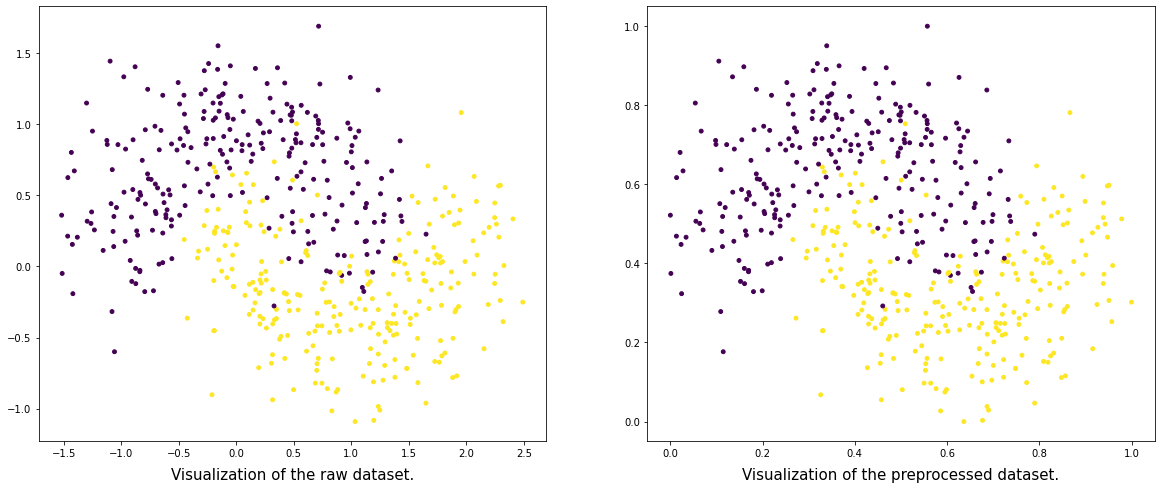

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=15, cmap="viridis")
axs[0].set_title("Visualization of the raw dataset.", y=-0.1, fontsize=15)

axs[1].scatter(
    feature_matrix["f0"],
    feature_matrix["f1"],
    marker="o",
    s=15,
    c=feature_matrix["label"],
    cmap="viridis",
)
axs[1].set_title("Visualization of the preprocessed dataset.", y=-0.1, fontsize=15)

In [13]:
# Split the dataset.
train_X, train_y, test_X, test_y = prepare_train_test_data(
    feature_matrix, ["f0", "f1"], test_ratio=0.2, random_state=123
)

# Train SVM with auto parameter optimization.
classifier, accuracy, feature_importance = train(
    train_X, train_y, test_X, test_y, model_type=ModelType.SVM, metrics=Metrics.Accuracy, display_cv_results=True
)

Best parameters selected: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support vectors: [[0.73799631 0.50613408]
 [0.6259615  0.87053217]
 [0.73401527 0.70991949]
 [0.54396679 0.52123095]
 [0.47760932 0.51915942]
 [0.79027533 0.47395767]
 [0.73571459 0.52007747]
 [0.30052779 0.58096265]
 [0.66087868 0.45693567]
 [0.68687062 0.42898794]
 [0.58248676 0.37844284]
 [0.66211234 0.42256303]
 [0.43636197 0.69044156]
 [0.41450707 0.6765027 ]
 [0.23902438 0.4120493 ]
 [0.62402277 0.37527035]
 [0.65523604 0.32906588]
 [0.41106868 0.65813768]
 [0.50256757 0.47984792]
 [0.35838077 0.65670829]
 [0.53384613 0.48089069]
 [0.44983204 0.48906508]
 [0.65203261 0.33920539]
 [0.39211879 0.57946309]
 [0.52410398 0.58739286]
 [0.55727341 1.        ]
 [0.67452026 0.3778425 ]
 [0.36435739 0.6411484 ]
 [0.2191829  0.40191653]
 [0.49578194 0.59018253]
 [0.36580624 0.57146363]
 [0.72409603 0.41312646]
 [0.61285604 0.4198004 ]
 [0.49970357 0.5014152 ]
 [0.59863138 0.42113363]
 [0.73250787 0.56182985]
 [0.31735932

Accuracy on the test set: 0.91
Feature's importance: [('f1', 0.244), ('f0', 0.19000000000000006)]


/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


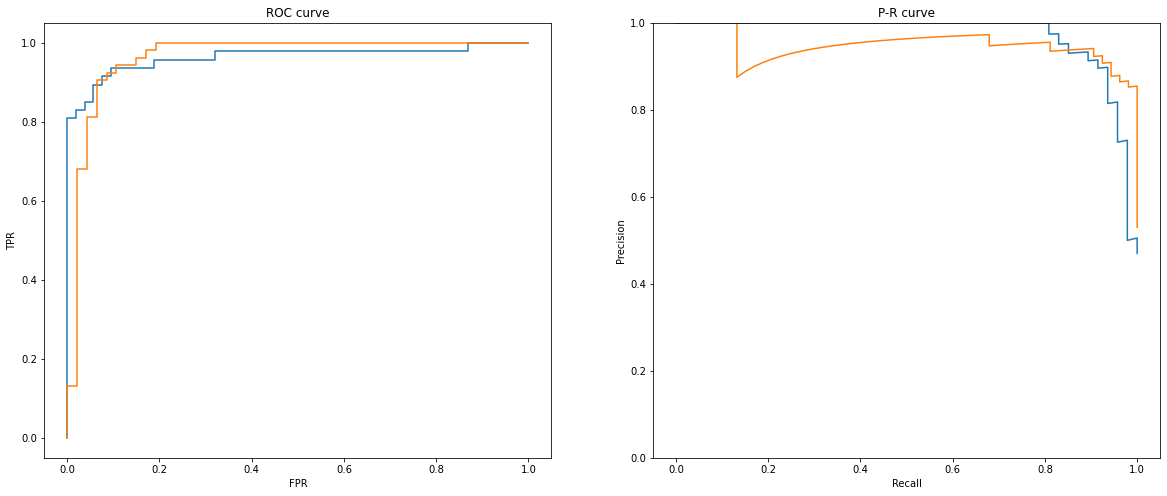

In [14]:
# Display model's performance.
print('Accuracy on the test set:', accuracy)
print("Feature's importance:", feature_importance)

# Plot ROC curve.
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.ylim(0, 1)
plot_performance(classifier, test_X.values, test_y, pos_label=0, ax=axs[0])
plot_performance(classifier, test_X.values, test_y, pos_label=1, ax=axs[0])

# Plot P-R curve
plot_performance(classifier, test_X.values, test_y, pos_label=0, ax=axs[1], roc=False)
plot_performance(classifier, test_X.values, test_y, pos_label=1, ax=axs[1], roc=False)

Text(0.5, -0.1, "Visualization of test set with model's prediction.")

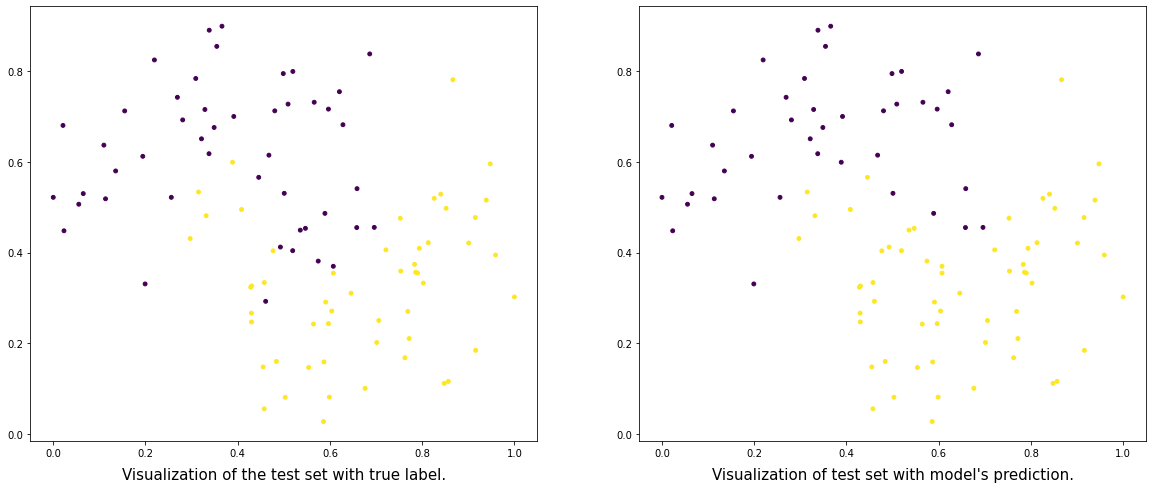

In [15]:
# Visualize the prediction.
predict_y = classifier.predict(test_X)
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].scatter(test_X.iloc[:, 0], test_X.iloc[:, 1], c=test_y, s=15, cmap="viridis")
axs[0].set_title("Visualization of the test set with true label.", y=-0.1, fontsize=15)

axs[1].scatter(
    test_X.iloc[:, 0], test_X.iloc[:, 1], marker="o", s=15, c=predict_y, cmap="viridis",
)
axs[1].set_title(
    "Visualization of test set with model's prediction.", y=-0.1, fontsize=15
)

Training SVM :
Best parameters selected: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support vectors: [[0.73799631 0.50613408]
 [0.6259615  0.87053217]
 [0.73401527 0.70991949]
 [0.54396679 0.52123095]
 [0.47760932 0.51915942]
 [0.79027533 0.47395767]
 [0.73571459 0.52007747]
 [0.30052779 0.58096265]
 [0.66087868 0.45693567]
 [0.68687062 0.42898794]
 [0.58248676 0.37844284]
 [0.66211234 0.42256303]
 [0.43636197 0.69044156]
 [0.41450707 0.6765027 ]
 [0.23902438 0.4120493 ]
 [0.62402277 0.37527035]
 [0.65523604 0.32906588]
 [0.41106868 0.65813768]
 [0.50256757 0.47984792]
 [0.35838077 0.65670829]
 [0.53384613 0.48089069]
 [0.44983204 0.48906508]
 [0.65203261 0.33920539]
 [0.39211879 0.57946309]
 [0.52410398 0.58739286]
 [0.55727341 1.        ]
 [0.67452026 0.3778425 ]
 [0.36435739 0.6411484 ]
 [0.2191829  0.40191653]
 [0.49578194 0.59018253]
 [0.36580624 0.57146363]
 [0.72409603 0.41312646]
 [0.61285604 0.4198004 ]
 [0.49970357 0.5014152 ]
 [0.59863138 0.42113363]
 [0.73250787 0.5618298

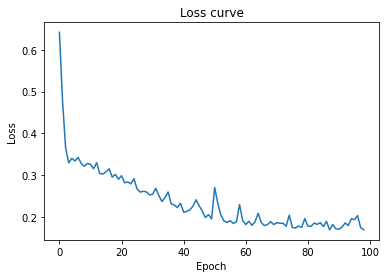

In [16]:
# Select the best model
models_performance = []
for model_type in ModelType:
    print("Training %s :" % model_type.value)
    classifier, accuracy, feature_importance = train(
        train_X,
        train_y,
        test_X,
        test_y,
        model_type=model_type,
        metrics=Metrics.Accuracy,
        n_jobs=20,
    )
    models_performance.append((model_type.value, accuracy))

models_performance.sort(key=lambda t: t[1], reverse=True)
print("Best model type:", models_performance[0][0])
print("Performance of the best model type:", models_performance[0][1])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

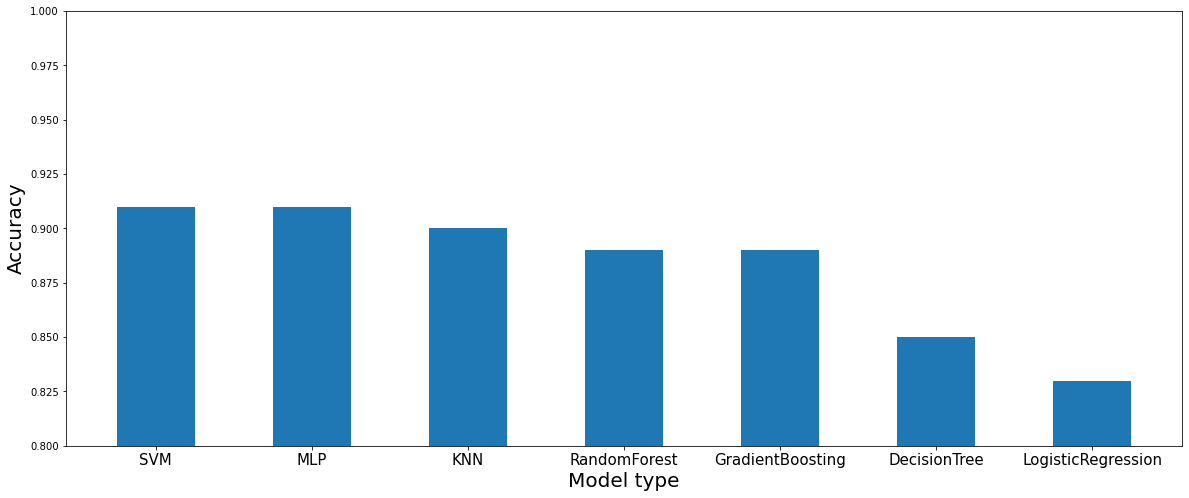

In [17]:
# Visualize the models' performance.
fig = plt.figure(figsize=(20, 8))
model_types, performance = zip(*models_performance)

plt.bar(model_types, performance, width=0.5)
plt.ylabel("Accuracy", size=20)
plt.ylim(0.8, 1)
plt.xlabel("Model type", size=20)
plt.xticks(size=15)

# 2. Example of make_circles.

In [18]:
# Generate dataset and preprocess.
X, y=make_circles(n_samples=500, shuffle=True, noise=0.1, random_state=123)

preprocessed_X = preprocess(X)
feature_matrix = pd.DataFrame(
    {"f0": preprocessed_X[:, 0], "f1": preprocessed_X[:, 1], "label": y}
)

Text(0.5, -0.1, 'Visualization of the preprocessed dataset.')

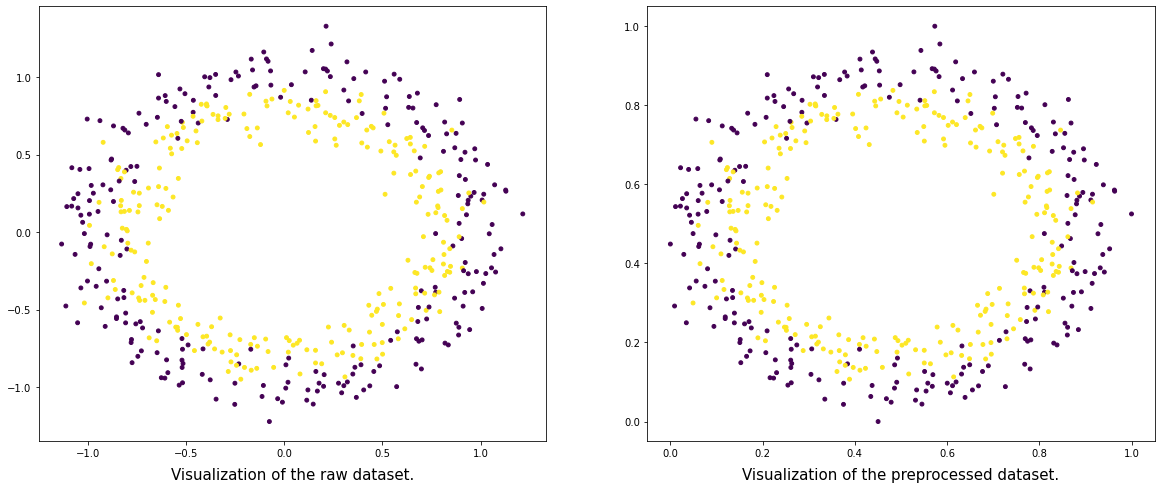

In [19]:
# Visualize the dataset.
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=15, cmap="viridis")
axs[0].set_title("Visualization of the raw dataset.", y=-0.1, fontsize=15)

axs[1].scatter(
    feature_matrix["f0"],
    feature_matrix["f1"],
    marker="o",
    s=15,
    c=feature_matrix["label"],
    cmap="viridis",
)
axs[1].set_title("Visualization of the preprocessed dataset.", y=-0.1, fontsize=15)

In [20]:
# Split the dataset.
train_X, train_y, test_X, test_y = prepare_train_test_data(
    feature_matrix, ["f0", "f1"], test_ratio=0.2, random_state=123
)

# Train SVM with auto parameter optimization.
classifier, accuracy, feature_importance = train(
    train_X, train_y, test_X, test_y, model_type=ModelType.SVM, metrics=Metrics.Accuracy, display_cv_results=True
)

Best parameters selected: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Support vectors: [[0.68953936 0.14105671]
 [0.77998317 0.33070839]
 [0.41720885 0.84617717]
 [0.2519901  0.71643139]
 [0.17047435 0.25266911]
 [0.08953496 0.59872997]
 [0.71351246 0.20538575]
 [0.56927017 0.1185826 ]
 [0.79155314 0.25949085]
 [0.77359029 0.28864784]
 [0.7278821  0.22700235]
 [0.10828976 0.66405821]
 [0.76952046 0.20948103]
 [0.78170866 0.20654432]
 [0.75248008 0.79468161]
 [0.20975202 0.22937807]
 [0.11239754 0.55657497]
 [0.16329667 0.64557695]
 [0.31920441 0.84629372]
 [0.24563019 0.79657221]
 [0.76983266 0.75631   ]
 [0.79564085 0.72342314]
 [0.70246274 0.79242023]
 [0.12479097 0.60829729]
 [0.49241989 0.16050088]
 [0.30491156 0.1194144 ]
 [0.88073595 0.55065268]
 [0.87785184 0.52303441]
 [0.13472971 0.33165744]
 [0.2076378  0.76951847]
 [0.12944139 0.45854483]
 [0.78681888 0.73630601]
 [0.49085826 0.09944619]
 [0.87515689 0.40227451]
 [0.16088879 0.2470806 ]
 [0.09864862 0.472296  ]
 [0.25934908

Accuracy on the test set: 0.81
Feature's importance: [('f0', 0.2700000000000001), ('f1', 0.20400000000000004)]


/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


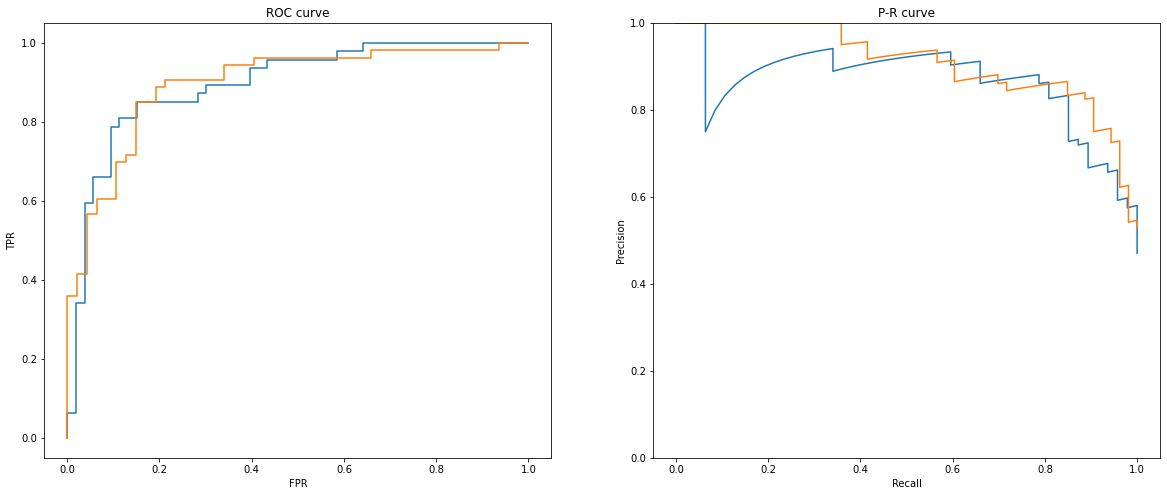

In [21]:
# Display model's performance.
print('Accuracy on the test set:', accuracy)
print("Feature's importance:", feature_importance)

# Plot ROC curve.
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.ylim(0, 1)
plot_performance(classifier, test_X.values, test_y, pos_label=0, ax=axs[0])
plot_performance(classifier, test_X.values, test_y, pos_label=1, ax=axs[0])

# Plot P-R curve
plot_performance(classifier, test_X.values, test_y, pos_label=0, ax=axs[1], roc=False)
plot_performance(classifier, test_X.values, test_y, pos_label=1, ax=axs[1], roc=False)

Text(0.5, -0.1, "Visualization of the test set with model's prediction.")

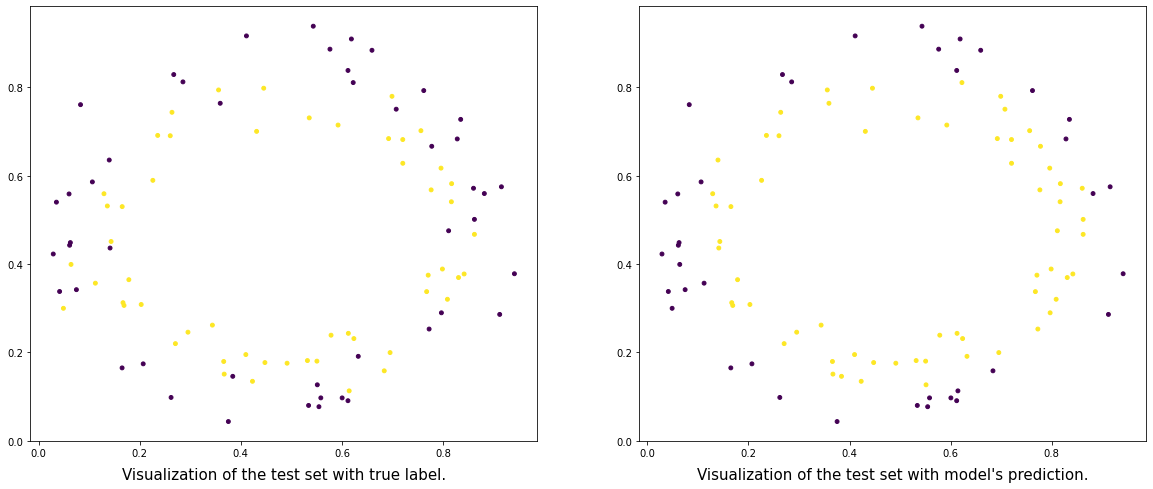

In [22]:
# Visualize the prediction.
predict_y = classifier.predict(test_X)
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].scatter(test_X.iloc[:, 0], test_X.iloc[:, 1], c=test_y, s=15, cmap="viridis")
axs[0].set_title("Visualization of the test set with true label.", y=-0.1, fontsize=15)

axs[1].scatter(
    test_X.iloc[:, 0], test_X.iloc[:, 1], marker="o", s=15, c=predict_y, cmap="viridis",
)
axs[1].set_title(
    "Visualization of the test set with model's prediction.", y=-0.1, fontsize=15
)

Training SVM :
Best parameters selected: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Support vectors: [[0.68953936 0.14105671]
 [0.77998317 0.33070839]
 [0.41720885 0.84617717]
 [0.2519901  0.71643139]
 [0.17047435 0.25266911]
 [0.08953496 0.59872997]
 [0.71351246 0.20538575]
 [0.56927017 0.1185826 ]
 [0.79155314 0.25949085]
 [0.77359029 0.28864784]
 [0.7278821  0.22700235]
 [0.10828976 0.66405821]
 [0.76952046 0.20948103]
 [0.78170866 0.20654432]
 [0.75248008 0.79468161]
 [0.20975202 0.22937807]
 [0.11239754 0.55657497]
 [0.16329667 0.64557695]
 [0.31920441 0.84629372]
 [0.24563019 0.79657221]
 [0.76983266 0.75631   ]
 [0.79564085 0.72342314]
 [0.70246274 0.79242023]
 [0.12479097 0.60829729]
 [0.49241989 0.16050088]
 [0.30491156 0.1194144 ]
 [0.88073595 0.55065268]
 [0.87785184 0.52303441]
 [0.13472971 0.33165744]
 [0.2076378  0.76951847]
 [0.12944139 0.45854483]
 [0.78681888 0.73630601]
 [0.49085826 0.09944619]
 [0.87515689 0.40227451]
 [0.16088879 0.2470806 ]
 [0.09864862 0.472296 

/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Best parameters selected: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 80}
Feature importances: [0.5040640640704248, 0.4959359359295751]
Train score: [1.23945056 1.11906542 1.00948259 0.91562031 0.83544984 0.76442154
 0.70735613 0.65017773 0.60182177 0.55527714 0.51611937 0.47986237
 0.4470114  0.41807695 0.39047547 0.36609001 0.34310902 0.32132672
 0.30167774 0.28230712 0.26457002 0.24849104 0.23136874 0.21541306
 0.20139673 0.18981648 0.17699354 0.16593484 0.15617037 0.14704479
 0.1382692  0.12908939 0.12159318 0.11447722 0.10649311 0.09976071
 0.0943959  0.08919889 0.08377423 0.07936006 0.07478569 0.07040819
 0.06654102 0.06249018 0.05880769 0.05536124 0.05239155 0.04954669
 0.04672999 0.04446462 0.04211488 0.03994058 0.03773724 0.03576196
 0.03389434 0.03240962 0.03071814 0.02928904 0.0278774  0.02652485
 0.02545564 0.02398512 0.02291814 0.02187218 0.02085921 0.01998634
 0.01920427 0.01842865 0.0177213  0

/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters selected: {'activation': 'relu', 'alpha': 1e-05, 'batch_size': 64, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate_init': 0.0005, 'max_iter': 100}
Best model type: KNN
Performance of the best model type: 0.82


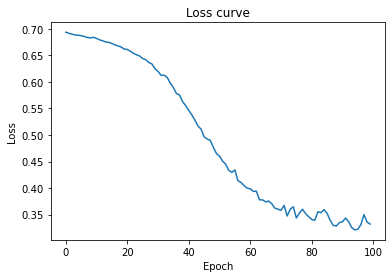

In [23]:
# Select the best model
models_performance = []
for model_type in ModelType:
    print("Training %s :" % model_type.value)
    classifier, accuracy, feature_importance = train(
        train_X,
        train_y,
        test_X,
        test_y,
        model_type=model_type,
        metrics=Metrics.Accuracy,
        n_jobs=20,
    )
    models_performance.append((model_type.value, accuracy))

models_performance.sort(key=lambda t: t[1], reverse=True)
print("Best model type:", models_performance[0][0])
print("Performance of the best model type:", models_performance[0][1])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

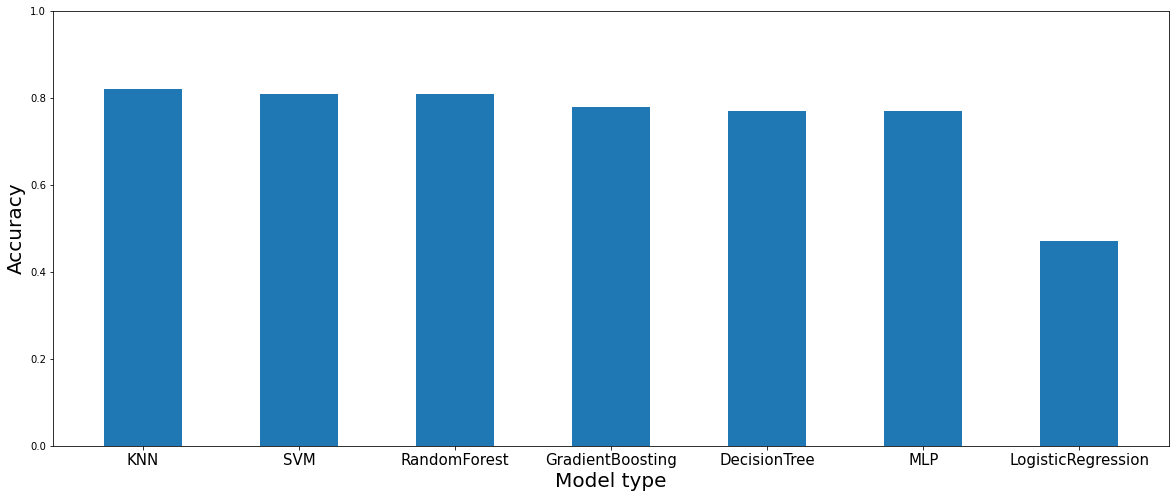

In [24]:
# Visualize the models' performance.
fig = plt.figure(figsize=(20, 8))
model_types, performance = zip(*models_performance)

plt.bar(model_types, performance, width=0.5)
plt.ylabel("Accuracy", size=20)
plt.ylim(0, 1)
plt.xlabel("Model type", size=20)
plt.xticks(size=15)

In [ ]:
Sel

In [27]:
for i in stats.uniform(1, 100):
    i

TypeError: 'rv_frozen' object is not iterable

In [28]:
GradientBoostingClassifier()

Real(low=0.1, high=0.9, prior='uniform', transform='identity')